# Pandas CheatSheet

In [2]:
import pandas as pd 

DataFrame:

就是一个SQL的表格Tabel

一个张量(有时是一个矩阵)

一个DataFrame可以被表示成一个JSON,也可以被表示成一个CSV

可以被JSON所初始化

In [3]:
data0={
    'a':[1,2,3],
    'b':[4,5,6],
    'c':['Bob','Alice','Jack']
}

In [4]:
pd.DataFrame(data0)

,a,b,c
0,1,4,Bob
1,2,5,Alice
2,3,6,Jack


In [5]:
data={'name': ['Alice', 'Bob', 'Charles', 'David', 'Eric'],
        'year': [2017, 2017, 2017, 2017,2017],#2017
        'salary': [40000, 24000, 31000, 20000, 30000],
        'pair':[{'a':1},{'a':2},{'a':3},{'a':4},{'a':5}]
       }

In [6]:
d=pd.DataFrame(data)

In [7]:
d

,name,year,salary,pair
0,Alice,2017,40000,{'a': 1}
1,Bob,2017,24000,{'a': 2}
2,Charles,2017,31000,{'a': 3}
3,David,2017,20000,{'a': 4}
4,Eric,2017,30000,{'a': 5}


In [8]:
d['pair']

0    {'a': 1}
1    {'a': 2}
2    {'a': 3}
3    {'a': 4}
4    {'a': 5}
Name: pair, dtype: object

In [9]:
d.pair

0    {'a': 1}
1    {'a': 2}
2    {'a': 3}
3    {'a': 4}
4    {'a': 5}
Name: pair, dtype: object

In [10]:
type(d.pair)

pandas.core.series.Series

In [11]:
d.pair.tolist()

[{'a': 1}, {'a': 2}, {'a': 3}, {'a': 4}, {'a': 5}]

In [12]:
d.pair[0]

{'a': 1}

## 薪水大于20000的人都有谁？

In [13]:
d.query('salary>20000')

,name,year,salary,pair
0,Alice,2017,40000,{'a': 1}
1,Bob,2017,24000,{'a': 2}
2,Charles,2017,31000,{'a': 3}
4,Eric,2017,30000,{'a': 5}


In [14]:
d[d.salary>20000]

,name,year,salary,pair
0,Alice,2017,40000,{'a': 1}
1,Bob,2017,24000,{'a': 2}
2,Charles,2017,31000,{'a': 3}
4,Eric,2017,30000,{'a': 5}


In [15]:
d.salary>20000

0     True
1     True
2     True
3    False
4     True
Name: salary, dtype: bool

In [16]:
d[d.salary>20000]

,name,year,salary,pair
0,Alice,2017,40000,{'a': 1}
1,Bob,2017,24000,{'a': 2}
2,Charles,2017,31000,{'a': 3}
4,Eric,2017,30000,{'a': 5}


## Eric的信息是什么?

In [17]:
##Pandas如何进行查询？
d.query("name=='Eric'")

,name,year,salary,pair
4,Eric,2017,30000,{'a': 5}


In [18]:
d[d.name=='Eric']

,name,year,salary,pair
4,Eric,2017,30000,{'a': 5}


In [19]:
d.loc[d.name=='Eric']

,name,year,salary,pair
4,Eric,2017,30000,{'a': 5}


### 联合查找：名叫Bob且薪水大于20000

In [20]:
d.query("name=='Bob' and salary>20000")

,name,year,salary,pair
1,Bob,2017,24000,{'a': 2}


## 列操作

在SQL中经常使用的 SELECT name,year,salary from T where salary>20000 and name=='Eric' 事实上是对于二阶张量的行和列的筛选

d.filter

In [21]:
d.filter(items=['name','year','salary'])

,name,year,salary
0,Alice,2017,40000
1,Bob,2017,24000
2,Charles,2017,31000
3,David,2017,20000
4,Eric,2017,30000


简化写法：
d[['a','b']]

In [22]:
d[['name','year']]

,name,year
0,Alice,2017
1,Bob,2017
2,Charles,2017
3,David,2017
4,Eric,2017


### 模糊查找

In [23]:
d.filter(like='2',axis=0)#模糊查找行

,name,year,salary,pair
2,Charles,2017,31000,{'a': 3}


In [24]:
d.filter(like='ea',axis=1)#模糊查找列

,year
0,2017
1,2017
2,2017
3,2017
4,2017


## 分组

In [25]:
df1 = pd.DataFrame( { 
    "Name" : ["Alice", "Ada", "Mallory", "Mallory", "Billy" , "Mallory"] , 
    "City" : ["Sydney", "Sydney", "Paris", "Sydney", "Sydney", "Paris"]} )

In [26]:
df1

,Name,City
0,Alice,Sydney
1,Ada,Sydney
2,Mallory,Paris
3,Mallory,Sydney
4,Billy,Sydney
5,Mallory,Paris


### 各自的城市都有多少人

In [27]:
df1.groupby(['City']).count()

,Name
City,
Paris,2
Sydney,4


In [28]:
# {
#     'Sydney':['Ada','Alice','Mallory','Billy']
# }

## 统计量分析

Numerical变量的数据分析

In [29]:
d.describe()

,year,salary
count,5.0,5.000000
mean,2017.0,29000.000000
std,0.0,7615.773106
min,2017.0,20000.000000
25%,2017.0,24000.000000
50%,2017.0,30000.000000
75%,2017.0,31000.000000
max,2017.0,40000.000000


### 统计函数

In [30]:
import numpy as np 

In [31]:
df2 = pd.DataFrame({'key1':['a', 'a', 'b', 'b', 'a'],
                   'key2':['one', 'two', 'one', 'two', 'one'],
                   'data1':np.random.randn(5),
                   'data2':np.random.randn(5)})

In [32]:
df2

,key1,key2,data1,data2
0,a,one,-0.633241,0.373068
1,a,two,0.836551,-0.215814
2,b,one,-0.340475,1.001276
3,b,two,2.447620,-0.911434
4,a,one,1.336313,0.054847


### 基于属性Key1的类型a和b各自的均值是多少(包括data1和data2但是不包括key2)

In [33]:
df2.groupby(['key1']).mean()

,data1,data2
key1,,
a,0.513208,0.070700
b,1.053572,0.044921


联合Group：'a-one','a-two','b-one','b-two'

In [34]:
df2.groupby(['key1','key2']).mean()

data1     data2
key1 key2                    
a    one   0.351536  0.213958
     two   0.836551 -0.215814
b    one  -0.340475  1.001276
     two   2.447620 -0.911434

In [35]:
df2.count()

key1     5
key2     5
data1    5
data2    5
dtype: int64

In [36]:
df2.groupby(['key1']).count()

,key2,data1,data2
key1,,,
a,3,3,3
b,2,2,2


In [37]:
df2.groupby(['key1','key2']).count()

data1  data2
key1 key2              
a    one       2      2
     two       1      1
b    one       1      1
     two       1      1

## 排序

In [38]:
df2

,key1,key2,data1,data2
0,a,one,-0.633241,0.373068
1,a,two,0.836551,-0.215814
2,b,one,-0.340475,1.001276
3,b,two,2.447620,-0.911434
4,a,one,1.336313,0.054847


In [39]:
df2.data2.sort_values()#对于列进行排序

3   -0.911434
1   -0.215814
4    0.054847
0    0.373068
2    1.001276
Name: data2, dtype: float64

In [40]:
df2.sort_values(by='key2')#整张表按照某一列的数值进行排序

,key1,key2,data1,data2
0,a,one,-0.633241,0.373068
2,b,one,-0.340475,1.001276
4,a,one,1.336313,0.054847
1,a,two,0.836551,-0.215814
3,b,two,2.447620,-0.911434


In [41]:
#多属性的排序
df2.sort_values(by=['key1','data1','data2'])

,key1,key2,data1,data2
0,a,one,-0.633241,0.373068
1,a,two,0.836551,-0.215814
4,a,one,1.336313,0.054847
2,b,one,-0.340475,1.001276
3,b,two,2.447620,-0.911434


In [42]:
df2.sort_values(by=['key1'],ascending=False)

,key1,key2,data1,data2
2,b,one,-0.340475,1.001276
3,b,two,2.447620,-0.911434
0,a,one,-0.633241,0.373068
1,a,two,0.836551,-0.215814
4,a,one,1.336313,0.054847


## DataFrame的增删改查

#### 1.如何选择某一行

In [45]:
df2.iloc[0]['key1']

'a'

In [46]:
df2.iloc[0].key1

'a'

In [47]:
df2.loc[0]

key1            a
key2          one
data1   -0.633241
data2    0.373068
Name: 0, dtype: object

In [48]:
df2

,key1,key2,data1,data2
0,a,one,-0.633241,0.373068
1,a,two,0.836551,-0.215814
2,b,one,-0.340475,1.001276
3,b,two,2.447620,-0.911434
4,a,one,1.336313,0.054847


In [54]:
df2.groupby(['key1']).count()

,key2,data1,data2
key1,,,
a,3,3,3
b,2,2,2


In [55]:
df2.groupby(['key1']).count().iloc[0]

key2     3
data1    3
data2    3
Name: a, dtype: int64

In [56]:
df2.groupby(['key1']).count().loc['a']

key2     3
data1    3
data2    3
Name: a, dtype: int64

In [ ]:
### 使用iloc获取dataframe的某行某列

In [57]:
df2.iloc[0,0]

'a'

In [59]:
df2.iloc[:,0]

0    a
1    a
2    b
3    b
4    a
Name: key1, dtype: object

In [62]:
df2.iloc[0:2]#Array slice

,key1,key2,data1,data2
0,a,one,-0.633241,0.373068
1,a,two,0.836551,-0.215814


In [64]:
df2.iloc[0:-1]

,key1,key2,data1,data2
0,a,one,-0.633241,0.373068
1,a,two,0.836551,-0.215814
2,b,one,-0.340475,1.001276
3,b,two,2.447620,-0.911434


打印前两行和后2列

In [71]:
df2.iloc[:2,-2:]

,data1,data2
0,-0.633241,0.373068
1,2.000000,-2.000000


### 数据的修改

#### .at[]

In [67]:
df2.at[1,'data1']=2

In [68]:
df2

,key1,key2,data1,data2
0,a,one,-0.633241,0.373068
1,a,two,2.000000,-0.215814
2,b,one,-0.340475,1.001276
3,b,two,2.447620,-0.911434
4,a,one,1.336313,0.054847


#### .iat[]

In [69]:
df2.iat[1,3]=-2.0


In [70]:
df2

,key1,key2,data1,data2
0,a,one,-0.633241,0.373068
1,a,two,2.000000,-2.000000
2,b,one,-0.340475,1.001276
3,b,two,2.447620,-0.911434
4,a,one,1.336313,0.054847


### 增加行

#### .append()

对于dataframe，每一行事实上代表着一个对象/向量，对于对象/向量的表示，使用json

In [75]:
df3=df2.append({'data1':1.2,'data2':1.4,'key1':'b','key2':'two'},ignore_index=True)

In [83]:
df2.loc[5]=['c','three',2,1]

In [84]:
df2

,key1,key2,data1,data2
0,a,one,-0.633241,0.373068
1,a,two,2.000000,-2.000000
2,b,one,-0.340475,1.001276
3,b,two,2.447620,-0.911434
4,a,one,1.336313,0.054847
5,c,three,2.000000,1.000000


### 增加列

#### .assign()

In [89]:
df3.assign(key3=[1,2,3,4,5,6])

,key1,key2,data1,data2,key4,key3
0,a,one,-0.633241,0.373068,6,1
1,a,two,2.000000,-2.000000,5,2
2,b,one,-0.340475,1.001276,4,3
3,b,two,2.447620,-0.911434,3,4
4,a,one,1.336313,0.054847,2,5
5,b,two,1.200000,1.400000,1,6


In [78]:
df4=df3.assign(key3=[1,2,3,4,5,6])

In [80]:
df3.loc[:,'key4']=[6,5,4,3,2,1]

In [81]:
df3

,key1,key2,data1,data2,key4
0,a,one,-0.633241,0.373068,6
1,a,two,2.000000,-2.000000,5
2,b,one,-0.340475,1.001276,4
3,b,two,2.447620,-0.911434,3
4,a,one,1.336313,0.054847,2
5,b,two,1.200000,1.400000,1


## Dataframe自带绘图

In [90]:
data3 = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'year': [2012, 2012, 2013, 2014, 2014], 
        'reports': [4, 24, 31, 2, 3]}
df3 = pd.DataFrame(data3, index = ['Cochice', 'Pima', 'Santa Cruz', 'Maricopa', 'Yuma'])
df3

,name,year,reports
Cochice,Jason,2012,4
Pima,Molly,2012,24
Santa Cruz,Tina,2013,31
Maricopa,Jake,2014,2
Yuma,Amy,2014,3


In [91]:
df3['reports']

Cochice        4
Pima          24
Santa Cruz    31
Maricopa       2
Yuma           3
Name: reports, dtype: int64

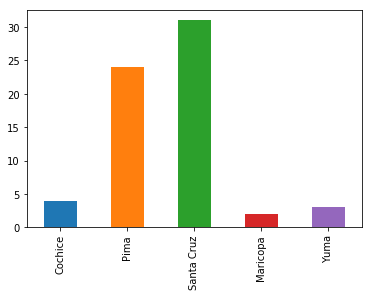

In [99]:
df3['reports'].plot.bar()

In [93]:
#import matplotlib.pyplot as plt

In [101]:
#plt.show()

In [98]:
%matplotlib inline

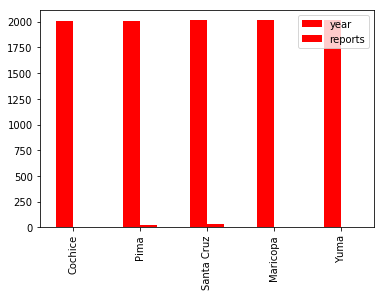

In [108]:
df3.plot.bar(color='r')

In [104]:
df3

,name,year,reports
Cochice,Jason,2012,4
Pima,Molly,2012,24
Santa Cruz,Tina,2013,31
Maricopa,Jake,2014,2
Yuma,Amy,2014,3


### 密度估计(Kernel Density Estimation)

In [110]:
import seaborn as sns

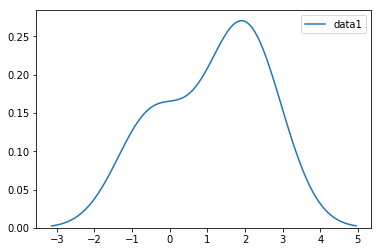

In [111]:
sns.kdeplot(df2['data1'])

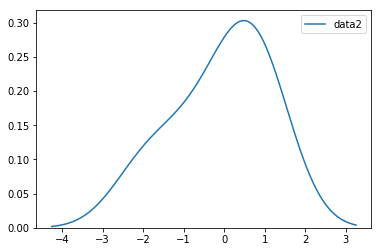

In [112]:
sns.kdeplot(df2['data2'])

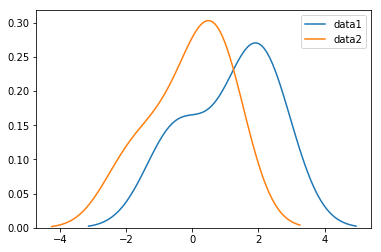

In [114]:
sns.kdeplot(df2['data1'])
sns.kdeplot(df2['data2'])

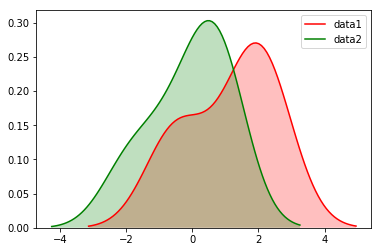

In [116]:
sns.kdeplot(df2['data1'],shade=True,color='r')
sns.kdeplot(df2['data2'],shade=True,color='g')

### 生成一段数据，并进行核密度估计

In [125]:
x=np.random.rand(5000)

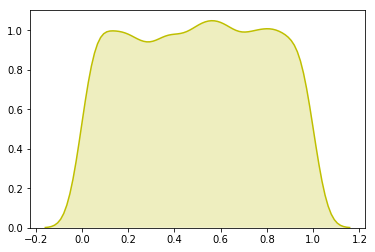

In [126]:
sns.kdeplot(x,shade=True,color='y')

In [123]:
type(x)

numpy.ndarray